[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nithiroj/azure-undp-weed-detection/blob/master/notebooks/UNDP.ipynb)

In [ ]:
## uncommnent and run for CoLab
# !pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 20kB/s 
     |████████████████████████████████| 4.0MB 32.4MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate, fbeta

import warnings
warnings.filterwarnings('ignore')

In [ ]:
tfms = get_transforms()

In [ ]:
bs = 64 # batch size

Load data [V2: Nonsegmented single plants (1.7GB)](https://vision.eng.au.dk/?download=/data/WeedData/NonsegmentedV2.zip) from [PAPER: A Public Image Database for Benchmark of Plant Seedling Classification Algorithms](http://arxiv.org/abs/1711.05458) and unzip to data directory as following:
```
data/
└── NonsegmentedV2
    ├── Black-grass
    ├── Charlock
    ├── Cleavers
    ├── Common Chickweed
    ├── Common wheat
    ├── Fat Hen
    ├── Loose Silky-bent
    ├── Maize
    ├── Scentless Mayweed
    ├── Shepherd’s Purse
    ├── Small-flowered Cranesbill
    └── Sugar beet
```



In [ ]:
data = (ImageList.from_folder(path='data/nonsegmentedv2')
        .split_by_rand_pct(0.2, seed=42)          
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [ ]:
data.train_ds

LabelList (4432 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Black-grass,Black-grass,Black-grass,Black-grass,Black-grass
Path: /content/drive/My Drive/Azure Hack/UNDP/data/nonsegmentedv2

In [ ]:
data.show_batch()

In [ ]:
data.classes

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'ShepherdтАЩs Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

# Training: resnet34

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.path

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.530292,1.130276,0.377597,34:52
1,1.460897,0.624459,0.219512,01:35
2,0.937696,0.455085,0.164408,01:31
3,0.662456,0.327211,0.113821,01:32
4,0.476275,0.327951,0.115628,01:32
5,0.395757,0.254248,0.102078,01:31
6,0.342712,0.240236,0.098464,01:31
7,0.309887,0.232653,0.090334,01:32
8,0.265877,0.216755,0.083108,01:31
9,0.244284,0.212758,0.086721,01:31


In [ ]:
learn.save('stage-1', return_path=True)

PosixPath('/content/drive/My Drive/Azure Hack/UNDP/data/nonsegmentedv2/models/stage-1.pth')

In [ ]:
learn.export('export_1.pkl')

# Result

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

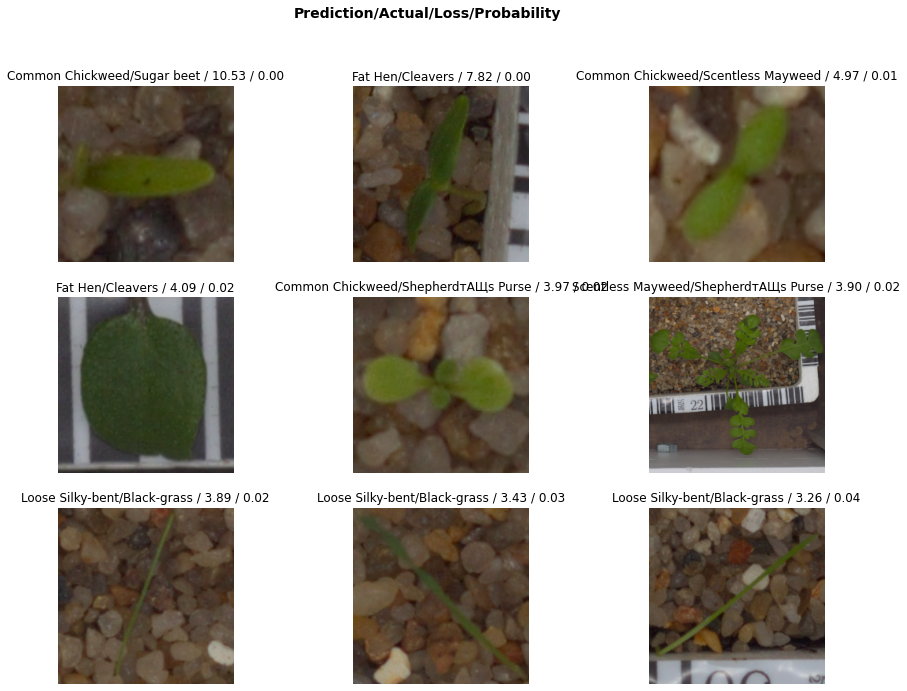

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

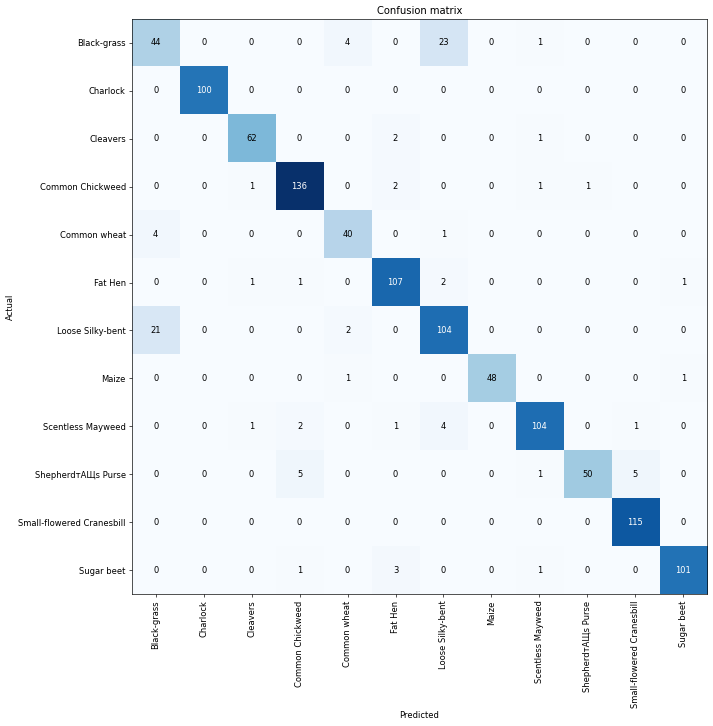

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused()

[('Black-grass', 'Loose Silky-bent', 23),
 ('Loose Silky-bent', 'Black-grass', 21),
 ('ShepherdтАЩs Purse', 'Common Chickweed', 5),
 ('ShepherdтАЩs Purse', 'Small-flowered Cranesbill', 5),
 ('Black-grass', 'Common wheat', 4),
 ('Common wheat', 'Black-grass', 4),
 ('Scentless Mayweed', 'Loose Silky-bent', 4),
 ('Sugar beet', 'Fat Hen', 3),
 ('Cleavers', 'Fat Hen', 2),
 ('Common Chickweed', 'Fat Hen', 2),
 ('Fat Hen', 'Loose Silky-bent', 2),
 ('Loose Silky-bent', 'Common wheat', 2),
 ('Scentless Mayweed', 'Common Chickweed', 2),
 ('Black-grass', 'Scentless Mayweed', 1),
 ('Cleavers', 'Scentless Mayweed', 1),
 ('Common Chickweed', 'Cleavers', 1),
 ('Common Chickweed', 'Scentless Mayweed', 1),
 ('Common Chickweed', 'ShepherdтАЩs Purse', 1),
 ('Common wheat', 'Loose Silky-bent', 1),
 ('Fat Hen', 'Cleavers', 1),
 ('Fat Hen', 'Common Chickweed', 1),
 ('Fat Hen', 'Sugar beet', 1),
 ('Maize', 'Common wheat', 1),
 ('Maize', 'Sugar beet', 1),
 ('Scentless Mayweed', 'Cleavers', 1),
 ('Scentless Ma

# Unfreezing, fine-tuning, and learning rates

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.412112,0.241124,0.084914,01:31


In [ ]:
learn.load('stage-1')

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


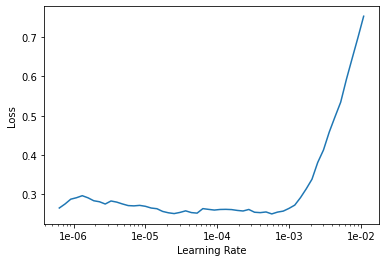

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.233789,0.208141,0.079494,01:32
1,0.212569,0.189521,0.069557,01:33


In [ ]:
# error rate decrease a little bit 
learn.save('stage-2', return_path=True)

PosixPath('/content/drive/My Drive/Azure Hack/UNDP/data/nonsegmentedv2/models/stage-2.pth')

In [ ]:
learn.export('export_2.pkl')

# Training: resnet50

In [ ]:
data = (ImageList.from_folder(path='data/nonsegmentedv2')
        .split_by_rand_pct(0.2, seed=42)          
        .label_from_folder()
        .transform(tfms, size=299)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


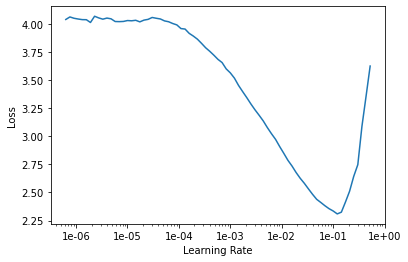

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.861887,0.710027,0.250226,02:01
1,1.052755,0.398135,0.145438,02:00
2,0.620194,0.328371,0.111111,02:00
3,0.412081,0.231065,0.085818,02:01
4,0.313179,0.216141,0.078591,02:00
5,0.258906,0.188005,0.072267,02:01
6,0.204944,0.149367,0.050587,02:01
7,0.167271,0.145749,0.050587,02:01
8,0.142009,0.135992,0.044264,02:02
9,0.124501,0.137882,0.050587,02:02


In [ ]:
learn.save('stage-1-50', return_path=True)

PosixPath('/content/drive/My Drive/Azure Hack/UNDP/data/nonsegmentedv2/models/stage-1-50.pth')

In [ ]:
learn.export('export_1_50.pkl')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.118459,0.133305,0.043360,02:10
1,0.112294,0.130857,0.041554,02:08
2,0.099958,0.126278,0.041554,02:10


In [ ]:
learn.save('stage-2-50', return_path=True)

PosixPath('/content/drive/My Drive/Azure Hack/UNDP/data/nonsegmentedv2/models/stage-2-50.pth')

In [ ]:
learn.export('export_2_50.pkl')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

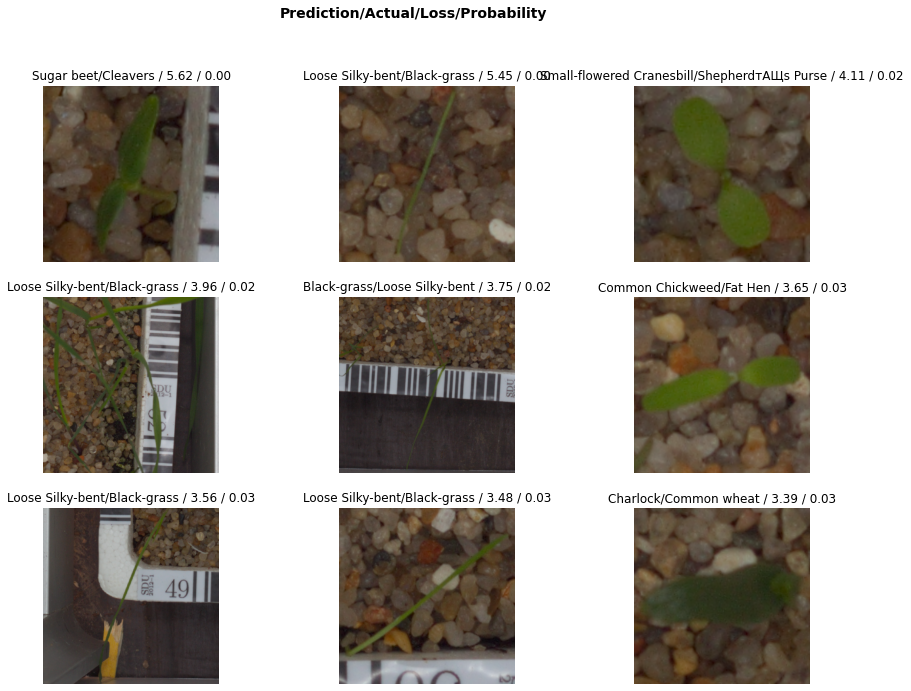

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

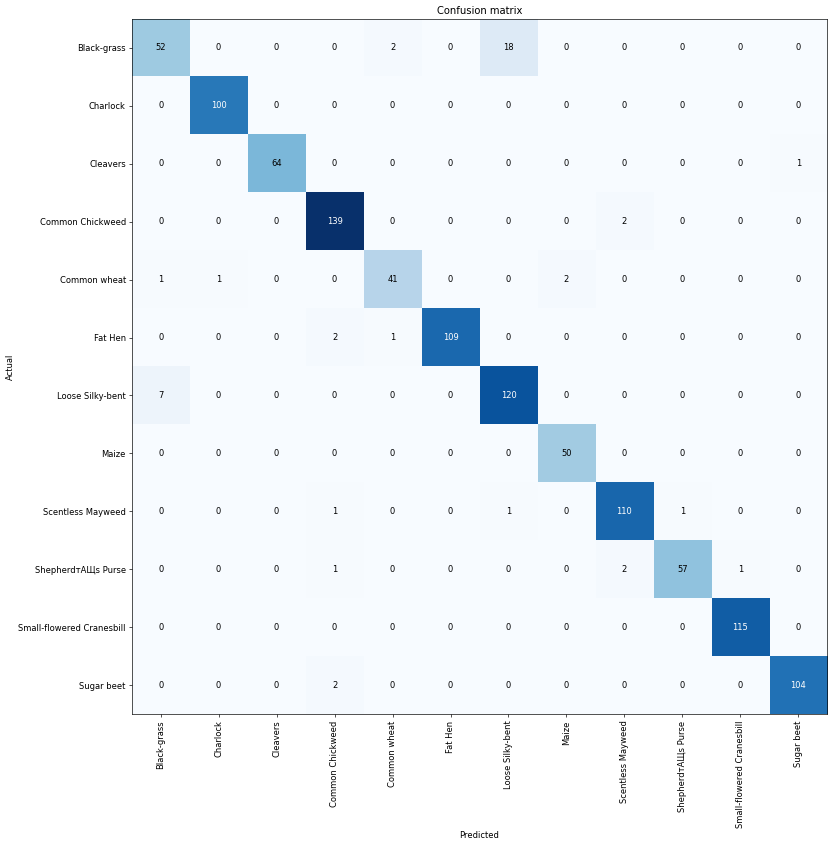

In [ ]:
interp.plot_confusion_matrix(figsize=(14,14), dpi=60)